In [1]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
with open('/content/drive/MyDrive/Colab Notebooks/Tesi/Iteration improvement/Results/results_nn.json') as f:
    data = json.load(f)

print(data)

[{'R2': -27.34614400898754, 'MAE': 0.6594137268579024, 'RMSE': 0.66793926804402, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 21.2082040309906}, {'R2': -124.86861193047191, 'MAE': 1.398616035435279, 'RMSE': 1.4075009710944026, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 14.217031717300415}, {'R2': -0.9277137717678969, 'MAE': 0.15196541042038886, 'RMSE': 0.17418520209264815, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 16.014843940734863}, {'R2': -26.301748974037494, 'MAE': 0.646011554747605, 'RMSE': 0.6555188977432527, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Number of Epochs': 200, 'Number of Iterations': 10, 'training_time': 21.178019285202026}, {'R2': -45.220932162877126, 'MAE': 0.8443263492198907, 'RMSE': 0.8529220295914572, 'Hidden Units': 64, 'Learning Rate': 0.001, 'Numb

In [5]:
# Use pd.json_normalize to convert the JSON to a DataFrame
df = pd.json_normalize(data)

# Display the DataFrame
df.head()

,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time
0,-27.346144,0.659414,0.667939,64,0.001,200,10,21.208204
1,-124.868612,1.398616,1.407501,64,0.001,200,10,14.217032
2,-0.927714,0.151965,0.174185,64,0.001,200,10,16.014844
3,-26.301749,0.646012,0.655519,64,0.001,200,10,21.178019
4,-45.220932,0.844326,0.852922,64,0.001,200,10,21.281480


# Plot

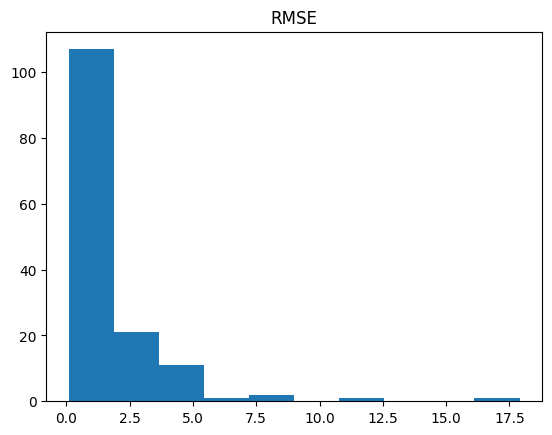

In [6]:
ax = df.hist(column='RMSE', grid=False)

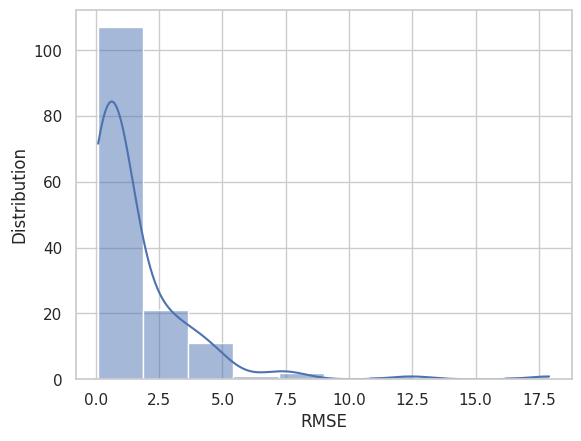

In [7]:
sns.set(style="whitegrid")

ax = sns.histplot(data=df, x='RMSE', kde=True, bins=10)

ax.set_ylabel('Distribution')

plt.show()

# Select the best data

In [8]:
mu = df['RMSE'].mean()
std = df['RMSE'].std()

print(f"mean: {round(mu, 2)}")
print(f"standard deviation: {round(std, 2)}")

mean: 1.56
standard deviation: 2.25


In [9]:
subset = df[(df["RMSE"] < mu + 2*std) & ( df["R2"] >0)]
subset.sort_values(by=['R2'], inplace=True, ascending=False)

subset = subset.iloc[:5]

subset

<ipython-input-9-402a4b7284b6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset.sort_values(by=['R2'], inplace=True, ascending=False)


,R2,MAE,RMSE,Hidden Units,Learning Rate,Number of Epochs,Number of Iterations,training_time
100,0.490833,0.066909,0.089520,64,0.001,300,10,21.702810
107,0.420162,0.072849,0.095531,64,0.001,300,10,21.166506
25,0.340043,0.076374,0.101917,64,0.001,200,20,14.365404
82,0.314790,0.075011,0.103849,64,0.001,200,40,14.823268
31,0.306399,0.076960,0.104483,64,0.001,200,30,21.206644


# 3D plot

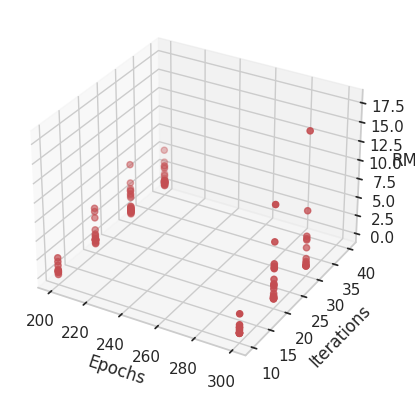

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df["Number of Epochs"],df["Number of Iterations"], df["RMSE"], c='r', marker='o')

# Set labels
ax.set_xlabel('Epochs')
ax.set_ylabel('Iterations')
ax.set_zlabel('RMSE')

# Show the plot
plt.show()